# Detecting Fake News

**What is Fake News?**

A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

**What is a TfidfVectorizer?**

**TF (Term Frequency):** The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

**IDF (Inverse Document Frequency):** Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.


 
The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

**What is a PassiveAggressiveClassifier?**

Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.


**Project Outcome**

The project of detecting fake news deals with fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

In [45]:
# libraries

import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt


In [46]:
#Read the data
df=pd.read_csv('/Users/petramala/Desktop/news.csv')
#Get shape and head
df.shape
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [47]:
# get column label
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [48]:
# Split the dataset

x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)
# assigns 20% to test and 80 to train

Let’s initialize a `TfidfVectorizer` with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

In [49]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)


In [50]:

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) # this step generates word counts for the words in x_train

tfidf_test=tfidf_vectorizer.transform(x_test)

In [51]:
print(tfidf_vectorizer.get_feature_names()[-10])


حلب


In [52]:
tfidf_train.shape
# 5 068 rows (5 068 docs) and 61 651 columns (61 651 unique words, minus single character words):


(5068, 61651)

In [53]:
tfidf_test.shape

(1267, 61651)

In [54]:
print(tfidf_train)

  (0, 56381)	0.03622223988286098
  (0, 16314)	0.053492157980948106
  (0, 19620)	0.030351855107005405
  (0, 52607)	0.04266045446208797
  (0, 14900)	0.039165339742818085
  (0, 53749)	0.029756205182552464
  (0, 15211)	0.07772572986248194
  (0, 61154)	0.06726619958695557
  (0, 59042)	0.047893261248723944
  (0, 42972)	0.03152542343098286
  (0, 54232)	0.038673616329284524
  (0, 59249)	0.04106143649018827
  (0, 28891)	0.06514397995138038
  (0, 41708)	0.03983513460128018
  (0, 50192)	0.045331181477256094
  (0, 44691)	0.0318676439567658
  (0, 11820)	0.046381950858248124
  (0, 7682)	0.04137048243377956
  (0, 50343)	0.10196965191544219
  (0, 48095)	0.021092647294770877
  (0, 17916)	0.03674587236023286
  (0, 46027)	0.10236534701241509
  (0, 16993)	0.02775494464904786
  (0, 55006)	0.03368300200002207
  (0, 51389)	0.03397042876291898
  :	:
  (5067, 32909)	0.09429823872256275
  (5067, 59221)	0.11305513144362901
  (5067, 14649)	0.03772971846597005
  (5067, 55827)	0.2218263076177088
  (5067, 10398)	0.0

Next, we’ll initialize a PassiveAggressiveClassifier. We’ll fit this on tfidf_train and y_train.

Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

In [55]:
# Initialize a PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# Predict on the test set and calculate accuracy

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.

In [56]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 42, 587]])

 We have 589 true positives, 587 true negatives, 42 false positives, and 49 false negatives.

# Fake News Detection - DataCamp tutorial

Bayesian models

### Data Exploration

Pandas DataFrame, check the shape, head and apply any necessary transformations

In [57]:
# Import `fake_or_real_news.csv` 
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")

In [58]:
# Inspect shape of `df` 
df.shape

(6335, 4)

In [59]:
# Print first lines of `df` 
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [60]:
# Set index 
df = df.set_index("Unnamed: 0")

# Print first lines of `df` 
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Extracting the training data

Now that the DataFrame looks closer to what you need, you want to separate the labels and set up training and test datasets.

For this notebook, I decided to focus on using the longer article text. Because I knew I would be using bag-of-words and Term Frequency–Inverse Document Frequency (TF-IDF) to extract features, this seemed like a good choice. Using longer text will hopefully allow for distinct words and features for my real and fake news data.

In [61]:
# Set `y` 
y = df.label 

In [62]:
# Drop the `label` column
df.drop("label", axis=1)

,title,text
Unnamed: 0,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ..."
7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o..."
95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...
4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...


In [63]:
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

### Building Vectorizer Classifiers

Now that you have your training and testing data, you can build your classifiers. To get a good idea if the words and tokens in the articles had a significant impact on whether the news was fake or real, you begin by using `CountVectorizer and TfidfVectorizer`.

You’ll see the example has a max threshhold set at .7 for the TF-IDF vectorizer `tfidf_vectorizer` using the `max_df argument`. This removes words which appear in more than 70% of the articles. Also, the built-in `stop_words` parameter will remove English stop words from the data before making vectors.

There are many more parameters available and you can read all about them in the scikit-learn documentation for TfidfVectorize and CountVectorizer.

In [64]:

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [65]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

Now that you have vectors, you can then take a look at the vector features, stored in count_vectorizer and tfidf_vectorizer.

Are there any noticable issues? (Yes!)

There are clearly comments, measurements or other nonsensical words as well as multilingual articles in the dataset that you have been using. Normally, you would want to spend more time preprocessing this and removing noise, but as this tutorial just showcases a small proof of concept, you will see if the model can overcome the noise and properly classify despite these issues.

In [66]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


### Intermezzo: Count versus TF-IDF Features

I was curious if my count and TF-IDF vectorizers had extracted different tokens. To take a look and compare features, you can extract the vector information back into a DataFrame to use easy Python comparisons.

As you can see by running the cells below, both vectorizers extracted the same tokens, but obviously have different weights. Likely, changing the `max_df` and `min_df` of the TF-IDF vectorizer could alter the result and lead to different features in each.

In [67]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [68]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [69]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [70]:
print(count_df.equals(tfidf_df))

False


In [71]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Comparing Models

Now it's time to train and test your models.

Here, you'll begin with an NLP favorite, `MultinomialNB`. You can use this to compare TF-IDF versus bag-of-words. My intuition was that bag-of-words (aka `CountVectorizer`) would perform better with this model. (For more reading on `multinomial` distribution and why it works best with integers, check out this fairly succinct explanation from a UPenn statistics course).

I personally find Confusion Matrices easier to compare and read, so I used the scikit-learn documentation to build some easily-readable confusion matrices (thanks open source!). A confusion matrix shows the proper labels on the main diagonal (top left to bottom right). The other cells show the incorrect labels, often referred to as false positives or false negatives. Depending on your problem, one of these might be more significant. For example, for the fake news problem, is it more important that we don't label real news articles as fake news? If so, we might want to eventually weight our accuracy score to better reflect this concern.

Other than Confusion Matrices, scikit-learn comes with many ways to visualize and compare your models. One popular way is to use a ROC Curve. There are many other ways to evaluate your model available in the scikit-learn metrics module.

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Drawing Confusion Matrix With TfIdf Vectorizer**

accuracy:   0.857
Confusion matrix, without normalization


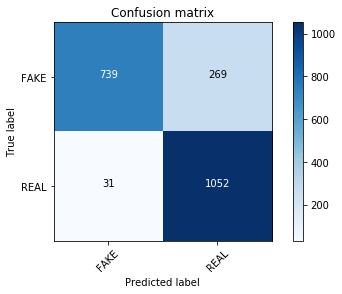

In [74]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Drawing Confusion Matrix With Bag Of Words (Count Vectorizer)

accuracy:   0.893
Confusion matrix, without normalization


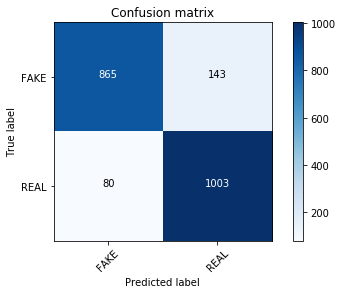

In [75]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

And indeed, with absolutely no parameter tuning, your count vectorized training set count_train is visibly outperforming your TF-IDF vectors!

### Testing Linear Models

There are a lot of great write-ups about how linear models work well with TF-IDF vectorizers (take a look at word2vec for classification, SVM reference in scikit-learn text analysis, and many more).

So you should use a SVM, right?

Well, I recently watched Victor Lavrenko's lecture on text classification and he compares Passive Aggressive classifiers to linear SVMs for text classification. We'll test this approach (which has some significant speed benefits and permanent learning disadvantages) with the fake news dataset.

**Drawing Confusion Matrix With Passive Agressive Classifier**

accuracy:   0.934
Confusion matrix, without normalization


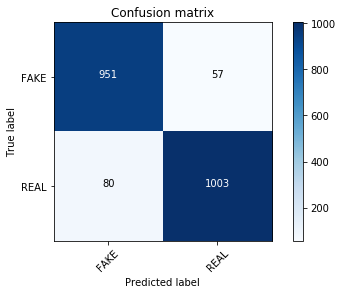

In [76]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

The confusion matrix looks different and the model classifies our fake news a bit better. We can test if tuning the alpha value for a MultinomialNB creates comparable results. You can also use parameter tuning with grid search for a more exhaustive search.

In [77]:
clf = MultinomialNB(alpha=0.1)


In [78]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766


/Users/petramala/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


Not quite... At this point, it might be interesting to perform parameter tuning across all of the classifiers, or take a look at some other scikit-learn Bayesian classifiers. You could also test with a Support Vector Machine (SVM) to see if that outperforms the Passive Aggressive classifier.

But I am a bit more curious about what the Passive Aggressive model actually has learned. So let's move onto introspection.

### Introspecting models

So fake news is solved, right? We achieved 93% accuracy on my dataset so let's all close up shop and go home.

Not quite, of course. I am wary at best of these results given how much noise we saw in the features. There is a great write-up on StackOverflow with this incredibly useful function for finding vectors that most affect labels. It only works for binary classificaiton (classifiers with 2 classes), but that's good news for you, since you only have FAKE or REAL labels.

Using your best performing classifier with your TF-IDF vector dataset (`tfidf_vectorizer`) and Passive Aggressive classifier (`linear_clf`), inspect the top 30 vectors for fake and real news:

In [79]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -4.970871305842294 2016
FAKE -4.158056665411209 october
FAKE -4.10132333509434 hillary
FAKE -3.203092643866443 share
FAKE -3.0037703441504586 article
FAKE -2.967123407154177 november
FAKE -2.6189790669116313 oct
FAKE -2.574531254941327 print
FAKE -2.4352932878866342 email
FAKE -2.4083421241436156 advertisement
FAKE -2.3893397455445204 source
FAKE -2.2689707230229135 mosul
FAKE -2.088464394815847 war
FAKE -2.0870875430058877 wikileaks
FAKE -2.0795967342065915 establishment
FAKE -1.978347105373653 corporate
FAKE -1.9769696120411098 com
FAKE -1.973445179332854 podesta
FAKE -1.9542729616747192 election
FAKE -1.8992365072732829 nov
FAKE -1.8881411391076262 pipeline
FAKE -1.8094255989742816 brexit
FAKE -1.7197909311862556 ayotte
FAKE -1.6962221480860573 26
FAKE -1.6927925548700604 donald
FAKE -1.690429866897319 snip
FAKE -1.672278306841482 photo
FAKE -1.6433962889785454 uk
FAKE -1.6365865595323195 entire
FAKE -1.615784841795114 jewish

REAL 4.8751577389747 said
REAL 2.613636036759295 sa

You can also do this in a pretty obvious way with only a few lines of Python, by zipping your coefficients to your features and taking a look at the top and bottom of your list.

In [80]:
feature_names = tfidf_vectorizer.get_feature_names()

In [81]:
# Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.257361214701583, 'trump'),
 (-6.494453094312678, 'said'),
 (-6.6539784739838845, 'clinton'),
 (-7.037944662867073, 'obama'),
 (-7.146539983381228, 'sanders'),
 (-7.215376008647511, 'president'),
 (-7.266562805741618, 'campaign'),
 (-7.2875931446681514, 'republican'),
 (-7.341118458599064, 'state'),
 (-7.341357110247905, 'cruz'),
 (-7.378312441985425, 'party'),
 (-7.44688067245789, 'new'),
 (-7.476288801154588, 'people'),
 (-7.547225599514773, 'percent'),
 (-7.5553074094582335, 'bush'),
 (-7.580150633909893, 'republicans'),
 (-7.5855405012652435, 'house'),
 (-7.634478172520314, 'voters'),
 (-7.648482443695299, 'rubio'),
 (-7.6734836186463795, 'states')]

In [82]:
# Most fake

sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]

So, clearly there are certain words which might show political intent and source in the top fake features (such as the words corporate and establishment).

Also, the real news data uses forms of the verb "to say" more often, likely because in newspapers and most journalistic publications sources are quoted directly ("German Chancellor Angela Merkel said...").

To extract the full list from your current classifier and take a look at each token (or easily compare tokens from classifier to classifier), you can easily export it like so.

In [83]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

### Intermezzo: HashingVectorizer

Another vectorizer used sometimes for text classification is a HashingVectorizer. `HashingVectorizers` require less memory and are faster (because they are sparse and use hashes rather than tokens) but are more difficult to introspect. You can read a bit more about the pros and cons of using `HashingVectorizer` in the scikit-learn documentation if you are interested.

You can give it a try and compare its results versus the other vectorizers. It performs fairly well, with better results than the TF-IDF vectorizer using `MultinomialNB` (this is somewhat expected due to the same reasons `CountVectorizers` perform better), but not as well as the TF-IDF vectorizer with Passive Aggressive linear algorithm.

In [84]:
hash_vectorizer = HashingVectorizer(stop_words='english', alternate_sign=False)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

In [85]:
clf = MultinomialNB(alpha=.01)

accuracy:   0.902
Confusion matrix, without normalization


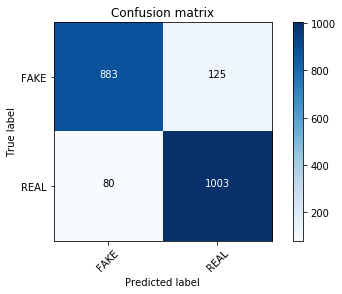

In [86]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [87]:
clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.923
Confusion matrix, without normalization


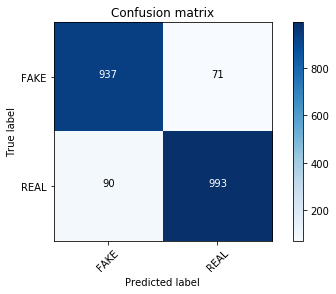

In [88]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Conclusion

So was your fake news classifier experiment a success? Definitely not.

But you did get to play around with a new dataset, test out some NLP classification models and introspect how successful they were? Yes.

As expected from the outset, defining fake news with simple bag-of-words or TF-IDF vectors is an oversimplified approach. Especially with a multilingual dataset full of noisy tokens. If you hadn't taken a look at what your model had actually learned, you might have thought the model learned something meaningful. So, remember: always introspect your models (as best you can!).

I would be curious if you find other trends in the data I might have missed. I will be following up with a post on how different classifiers compare in terms of important features on my blog. If you spend some time researching and find anything interesting, feel free to share your findings and notes in the comments or you can always reach out on Twitter (I'm @kjam).

I hope you had some fun exploring a new NLP dataset with me!

In [90]:
! jupyter nbconvert --to html Detecting_Fake_News.ipynb

[NbConvertApp] Converting notebook Detecting_Fake_News.ipynb to html
[NbConvertApp] Writing 445830 bytes to Detecting_Fake_News.html
